<a href="https://colab.research.google.com/github/Sophie0532/bi_project/blob/main/dataset_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== INFORME DE CALIDAD DE DATOS Y ANÁLISIS DESCRIPTIVO ===

I. EVALUACIÓN DE CALIDAD DE DATOS
--------------------------------------------------
1. DIMENSIONES DEL DATASET:
   - Filas: 200
   - Columnas: 11

2. VALORES NULOS POR COLUMNA:
   - Fecha cirugía: 0 valores nulos (0.0%)
   - IDPaciente: 0 valores nulos (0.0%)
   - Fecha nacimiento: 0 valores nulos (0.0%)
   - Sexo: 14 valores nulos (7.0%)
   - Técnica empleada: 35 valores nulos (17.5%)
   - Comorbilidades: 166 valores nulos (83.0%)
   - Agudeza visual preoperatoria: 0 valores nulos (0.0%)
   - Agudeza visual postoperatoria: 0 valores nulos (0.0%)
   - Graduacion: 0 valores nulos (0.0%)
   - Medicación: 191 valores nulos (95.5%)
   - Complicaciones: 200 valores nulos (100.0%)

3. TIPOS DE DATOS:
Fecha cirugía                    datetime64[ns]
IDPaciente                                int64
Fecha nacimiento                          int64
Sexo                                     object
Técnica empleada                         ob

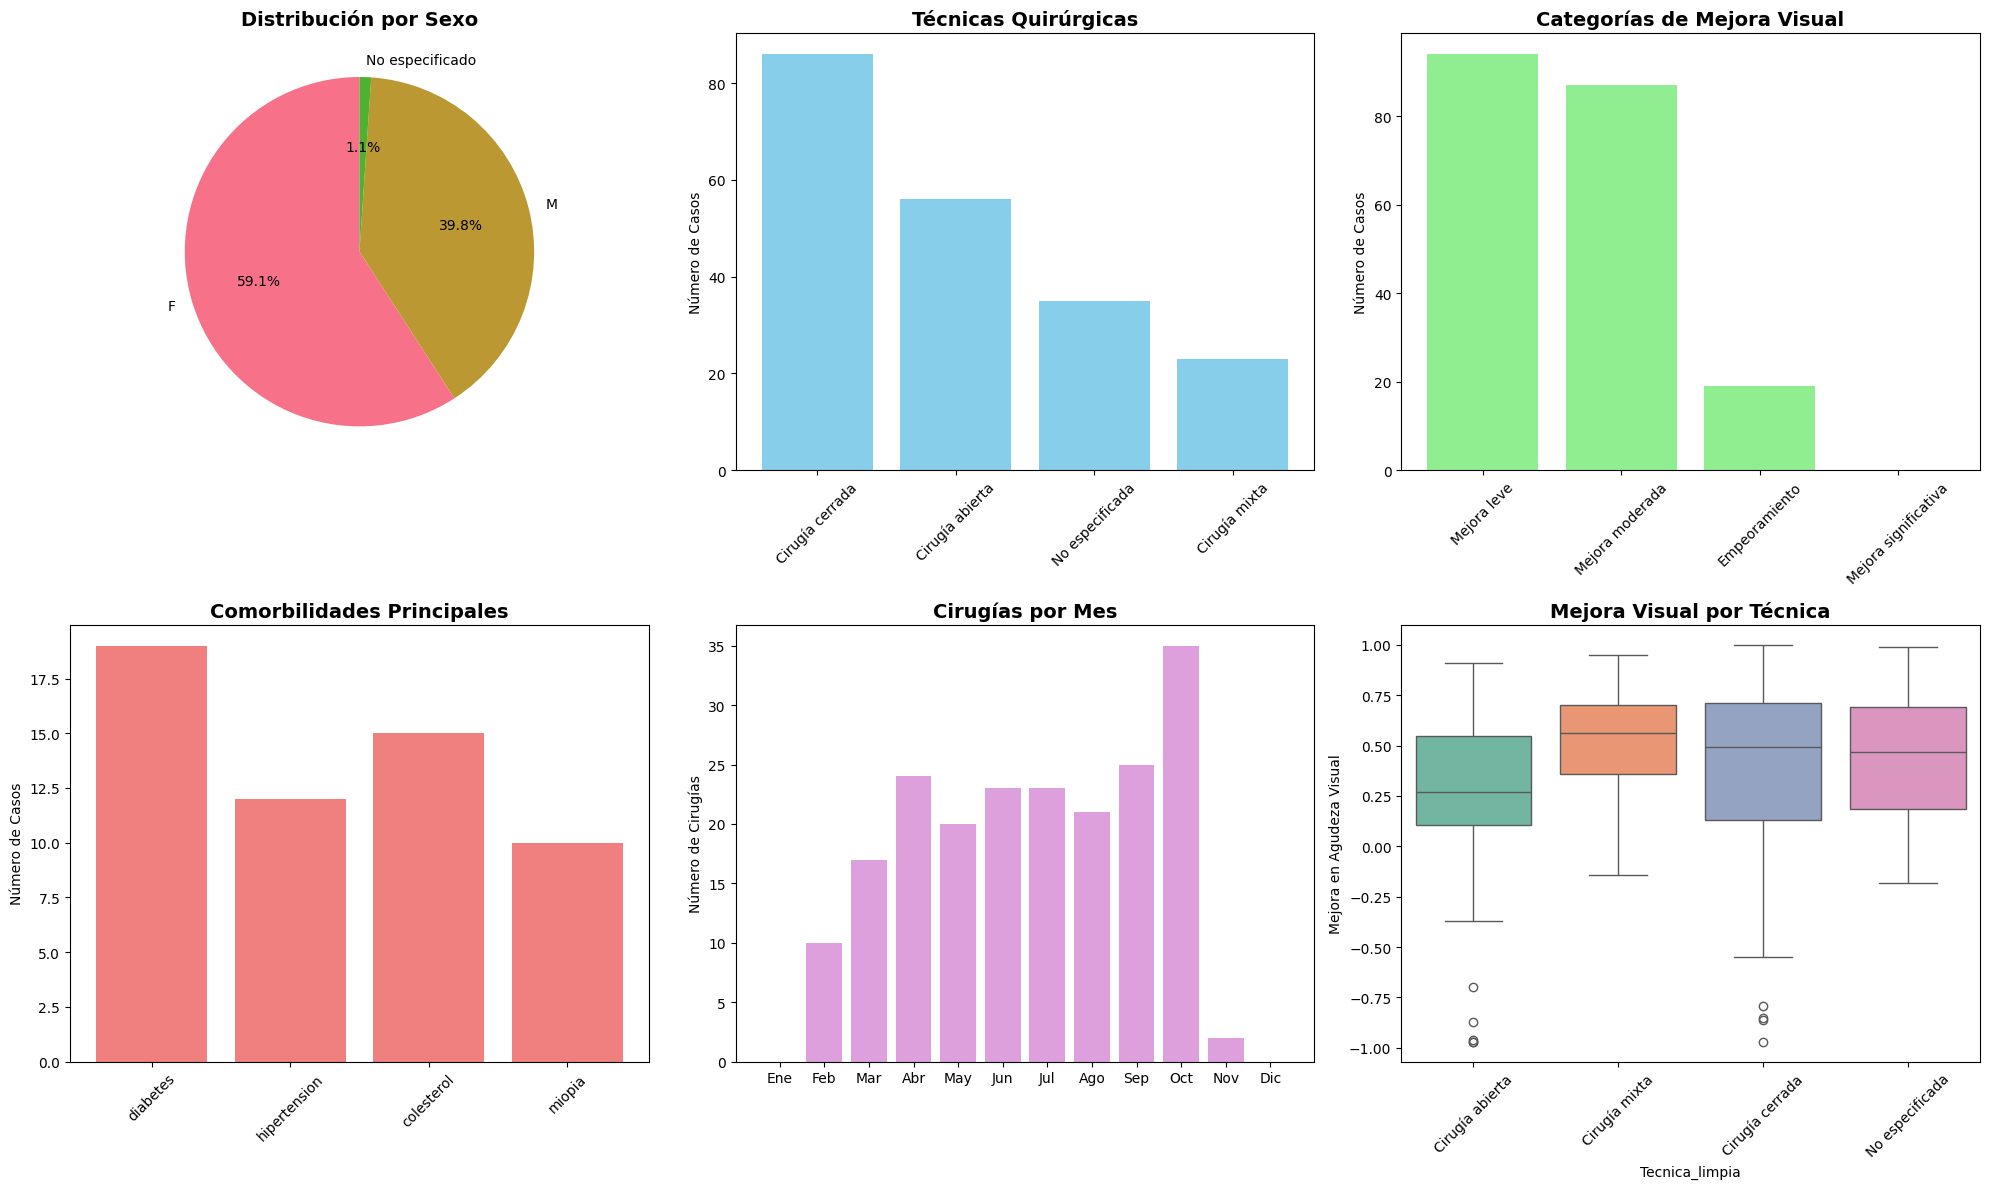


V. RESUMEN FINAL
--------------------------------------------------
✓ Análisis de calidad completado
✓ Análisis descriptivo generado
✓ Transformaciones de datos aplicadas
✓ Visualizaciones guardadas en 'analisis_cataratas.png'
✓ Dataset transformado guardado en 'dataset_cataratas_transformado.csv'

RECOMENDACIONES PARA EL CLIENTE:
1. Considerar estandarizar el registro de comorbilidades y medicación
2. Implementar validación de datos en el momento de captura
3. Completar información faltante en técnicas quirúrgicas
4. Verificar valores atípicos en agudeza visual postoperatoria
5. Revisar la consistencia de los datos de fecha de nacimiento

VI. TABLAS RESUMEN ADICIONALES
--------------------------------------------------

1. RESUMEN POR TÉCNICA QUIRÚRGICA:
                 Edad_Promedio  AV_Preop  AV_Postop  Mejora_AV  \
Tecnica_limpia                                                   
Cirugía abierta          37.31      0.45       0.69       0.24   
Cirugía cerrada          39.17     

In [9]:
# ANÁLISIS DE DATOS DE CIRUGÍA DE CATARATAS - INFORME PARA EL CLIENTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=== INFORME DE CALIDAD DE DATOS Y ANÁLISIS DESCRIPTIVO ===\n")

# I. CARGA Y EXPLORACIÓN INICIAL DE DATOS

# Cargar datos desde GitHub
url = "https://github.com/Sophie0532/bi_project/raw/main/dataset_R.xlsx"
df = pd.read_excel(url, sheet_name='Hoja1')

print("I. EVALUACIÓN DE CALIDAD DE DATOS")
print("-" * 50)

# Dimensiones del dataset
print("1. DIMENSIONES DEL DATASET:")
print(f"   - Filas: {df.shape[0]}")
print(f"   - Columnas: {df.shape[1]}")

# Valores nulos por columna
print("\n2. VALORES NULOS POR COLUMNA:")
null_counts = df.isnull().sum()
for col, count in null_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   - {col}: {count} valores nulos ({percentage:.1f}%)")

# Tipos de datos
print("\n3. TIPOS DE DATOS:")
print(df.dtypes)

# Registros duplicados
duplicados = df.duplicated().sum()
print(f"\n4. REGISTROS DUPLICADOS EXACTOS: {duplicados}")

# Pacientes duplicados
pacientes_duplicados = df['IDPaciente'].duplicated().sum()
print(f"5. PACIENTES CON MÚLTIPLES REGISTROS: {pacientes_duplicados}")

# Valores únicos en columnas categóricas
print("\n6. VALORES ÚNICOS EN COLUMNAS CATEGÓRICAS:")
categorical_cols = ['Sexo', 'Técnica empleada', 'Comorbilidades', 'Medicación', 'Complicaciones']
for col in categorical_cols:
    if col in df.columns:
        unique_vals = df[col].nunique()
        print(f"   - {col}: {unique_vals} valores únicos")

# II. ANÁLISIS DESCRIPTIVO GENERA

print(f"\nII. ANÁLISIS DESCRIPTIVO GENERAL")
print("-" * 50)

# 1. Estadísticas demográficas
print("1. ESTADÍSTICAS DEMOGRÁFICAS:")

# Convertir fechas y calcular edad
df['Fecha cirugía'] = pd.to_datetime(df['Fecha cirugía'])

# Convertir fecha de nacimiento (asumiendo formato Excel)
def excel_date_to_datetime(excel_date):
    try:
        return pd.to_datetime('1899-12-30') + timedelta(days=excel_date)
    except:
        return pd.NaT

df['Fecha_nacimiento'] = df['Fecha nacimiento'].apply(excel_date_to_datetime)
df['Edad'] = (df['Fecha cirugía'] - df['Fecha_nacimiento']).dt.days / 365.25

print(f"   - Edad promedio: {df['Edad'].mean():.1f} años")
print(f"   - Edad mínima: {df['Edad'].min():.1f} años")
print(f"   - Edad máxima: {df['Edad'].max():.1f} años")

# Distribución por sexo
print(f"\n2. DISTRIBUCIÓN POR SEXO:")
sex_dist = df['Sexo'].value_counts()
for sexo, count in sex_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   - {sexo}: {count} pacientes ({percentage:.1f}%)")

# 2. Análisis de técnicas quirúrgicas
print(f"\n3. TÉCNICAS QUIRÚRGICAS EMPLEADAS:")
tecnicas = df['Técnica empleada'].value_counts(dropna=False)
for tecnica, count in tecnicas.items():
    tecnica_name = 'No especificada' if pd.isna(tecnica) or tecnica == '' else tecnica
    percentage = (count / len(df)) * 100
    print(f"   - {tecnica_name}: {count} casos ({percentage:.1f}%)")

# 3. Análisis de agudeza visual
print(f"\n4. AGUDEZA VISUAL:")
df['Agudeza visual preoperatoria'] = pd.to_numeric(df['Agudeza visual preoperatoria'], errors='coerce')
df['Agudeza visual postoperatoria'] = pd.to_numeric(df['Agudeza visual postoperatoria'], errors='coerce')

print(f"   - Agudeza visual preoperatoria promedio: {df['Agudeza visual preoperatoria'].mean():.2f}")
print(f"   - Agudeza visual postoperatoria promedio: {df['Agudeza visual postoperatoria'].mean():.2f}")

# Calcular mejora en agudeza visual
df['Mejora_agudeza'] = df['Agudeza visual postoperatoria'] - df['Agudeza visual preoperatoria']
print(f"   - Mejora promedio en agudeza visual: {df['Mejora_agudeza'].mean():.2f}")

# 4. Análisis de graduación
print(f"\n5. DISTRIBUCIÓN DE GRADUACIÓN (DIOPTRÍAS):")
# Extraer valores numéricos de la columna Graduacion
df['Graduacion_numerica'] = df['Graduacion'].str.extract('(\d+)').astype(float)
print(f"   - Graduación promedio: {df['Graduacion_numerica'].mean():.1f} dioptrias")
print(f"   - Rango de graduación: {df['Graduacion_numerica'].min():.0f} - {df['Graduacion_numerica'].max():.0f} dioptrias")

# 5. Análisis de comorbilidades
print(f"\n6. COMORBILIDADES MÁS FRECUENTES:")
# Contar comorbilidades (separadas por coma)
comorbilidades = df['Comorbilidades'].dropna().str.split(',').explode().str.strip()
comorb_counts = comorbilidades.value_counts()
print("   - Comorbilidades encontradas:")
for comorb, count in comorb_counts.head(10).items():
    if comorb:  # Excluir strings vacíos
        print(f"     * {comorb}: {count} casos")

# 6. Análisis temporal
print(f"\n7. DISTRIBUCIÓN TEMPORAL:")
df['Mes_cirugia'] = df['Fecha cirugía'].dt.month
mes_counts = df['Mes_cirugia'].value_counts().sort_index()
print("   - Cirugías por mes:")
for mes, count in mes_counts.items():
    print(f"     * Mes {mes}: {count} cirugías")

# III. TRANSFORMACIONES DE DATOS PARA ANÁLISIS POSTERIOR

print(f"\nIII. TRANSFORMACIONES DE DATOS APLICADAS")
print("-" * 50)

# 1. Limpieza de columnas categóricas
df['Sexo_limpio'] = df['Sexo'].replace({'': 'No especificado', 'D': 'No especificado', 'Ñ': 'No especificado'})
df['Tecnica_limpia'] = df['Técnica empleada'].fillna('No especificada')

# 2. Crear categorías de edad
df['Grupo_edad'] = pd.cut(df['Edad'],
                         bins=[0, 40, 60, 80, 100],
                         labels=['<40', '40-60', '60-80', '>80'],
                         right=False)

# 3. Categorizar mejora en agudeza visual
df['Categoria_mejora'] = pd.cut(df['Mejora_agudeza'],
                               bins=[-float('inf'), 0, 0.5, 1, float('inf')],
                               labels=['Empeoramiento', 'Mejora leve', 'Mejora moderada', 'Mejora significativa'])

# 4. Crear variables dummy para comorbilidades
comorbilidades_principales = ['diabetes', 'hipertension', 'colesterol', 'miopia']
for comorb in comorbilidades_principales:
    df[f'Comorb_{comorb}'] = df['Comorbilidades'].str.contains(comorb, case=False, na=False).astype(int)

# 5. Estandarizar medicación
df['Medicacion_estandarizada'] = df['Medicación'].str.lower().str.strip()
medicaciones_comunes = {
    'ibuprofeno': 'ibuprofeno',
    'ibp': 'ibuprofeno',
    'ibux': 'ibuprofeno',
    'irbupforeno': 'ibuprofeno',
    'paracetamol': 'paracetamol',
    'paracematol': 'paracetamol',
    'dolotix': 'analgesico',
    'dolotis': 'analgesico'
}
df['Medicacion_estandarizada'] = df['Medicacion_estandarizada'].replace(medicaciones_comunes)

print("Transformaciones aplicadas:")
print("   - Limpieza de sexo y técnica quirúrgica")
print("   - Categorización por grupos de edad")
print("   - Categorización de mejora visual")
print("   - Variables dummy para comorbilidades principales")
print("   - Estandarización de medicación")

# IV. VISUALIZACIONES

print(f"\nIV. GENERANDO VISUALIZACIONES...")
print("-" * 50)

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Distribución por sexo
sex_dist_clean = df['Sexo_limpio'].value_counts()
axes[0,0].pie(sex_dist_clean.values, labels=sex_dist_clean.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución por Sexo', fontsize=14, fontweight='bold')

# 2. Técnicas quirúrgicas
tecnicas_clean = df['Tecnica_limpia'].value_counts()
axes[0,1].bar(tecnicas_clean.index, tecnicas_clean.values, color='skyblue')
axes[0,1].set_title('Técnicas Quirúrgicas', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Número de Casos')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Distribución de mejora visual
mejora_cats = df['Categoria_mejora'].value_counts()
axes[0,2].bar(mejora_cats.index, mejora_cats.values, color='lightgreen')
axes[0,2].set_title('Categorías de Mejora Visual', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('Número de Casos')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Comorbilidades principales
comorb_sum = df[[f'Comorb_{c}' for c in comorbilidades_principales]].sum()
axes[1,0].bar(comorbilidades_principales, comorb_sum.values, color='lightcoral')
axes[1,0].set_title('Comorbilidades Principales', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Número de Casos')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Distribución temporal
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
mes_data = [mes_counts.get(i, 0) for i in range(1, 13)]
axes[1,1].bar(meses_nombres, mes_data, color='plum')
axes[1,1].set_title('Cirugías por Mes', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Número de Cirugías')

# 6. Boxplot de mejora por técnica
df_boxplot = df.dropna(subset=['Mejora_agudeza', 'Tecnica_limpia'])
sns.boxplot(data=df_boxplot, x='Tecnica_limpia', y='Mejora_agudeza', ax=axes[1,2], palette='Set2')
axes[1,2].set_title('Mejora Visual por Técnica', fontsize=14, fontweight='bold')
axes[1,2].set_ylabel('Mejora en Agudeza Visual')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('analisis_cataratas.png', dpi=300, bbox_inches='tight')
plt.show()

# V. GUARDAR DATASET TRANSFORMADO

# Guardar dataset transformado
df.to_csv('dataset_cataratas_transformado.csv', index=False, encoding='utf-8-sig')

print(f"\nV. RESUMEN FINAL")
print("-" * 50)
print("✓ Análisis de calidad completado")
print("✓ Análisis descriptivo generado")
print("✓ Transformaciones de datos aplicadas")
print("✓ Visualizaciones guardadas en 'analisis_cataratas.png'")
print("✓ Dataset transformado guardado en 'dataset_cataratas_transformado.csv'")

print(f"\nRECOMENDACIONES PARA EL CLIENTE:")
print("1. Considerar estandarizar el registro de comorbilidades y medicación")
print("2. Implementar validación de datos en el momento de captura")
print("3. Completar información faltante en técnicas quirúrgicas")
print("4. Verificar valores atípicos en agudeza visual postoperatoria")
print("5. Revisar la consistencia de los datos de fecha de nacimiento")

# VI. ANÁLISIS ADICIONAL - TABLAS RESUMEN

print(f"\nVI. TABLAS RESUMEN ADICIONALES")
print("-" * 50)

# Resumen por técnica quirúrgica
print("\n1. RESUMEN POR TÉCNICA QUIRÚRGICA:")
resumen_tecnica = df.groupby('Tecnica_limpia').agg({
    'Edad': 'mean',
    'Agudeza visual preoperatoria': 'mean',
    'Agudeza visual postoperatoria': 'mean',
    'Mejora_agudeza': 'mean',
    'Graduacion_numerica': 'mean',
    'IDPaciente': 'count'
}).round(2)
resumen_tecnica.columns = ['Edad_Promedio', 'AV_Preop', 'AV_Postop', 'Mejora_AV', 'Graduacion_Promedio', 'N_Casos']
print(resumen_tecnica)

# Resumen de comorbilidades
print("\n2. RESUMEN DE COMORBILIDADES:")
comorb_summary = pd.DataFrame({
    'Comorbilidad': comorbilidades_principales,
    'Frecuencia': [df[f'Comorb_{c}'].sum() for c in comorbilidades_principales],
    'Porcentaje': [f"{(df[f'Comorb_{c}'].sum() / len(df)) * 100:.1f}%"
                   for c in comorbilidades_principales]
})
print(comorb_summary)

print(f"\n=== ANÁLISIS COMPLETADO ===")

